Exploratory data analysis (EDA) is a crucial component of data science which allows one to understand the basics of what your data looks like and what kinds of questions might be answered by them. For this task, we are going to clean, sanitise and explore our data. Using the movies dataset, answer the following questions by writing code in the cells.


In [142]:
# Importing the required packages here

import numpy as np
import pandas as pd
import seaborn as sns
import ast, json

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline


In [143]:
#### load the movie dataset and create their dataframes
movies_df = pd.read_csv('movies.csv')


### Data Cleansing 
#### Clean the data. Identify columns that are redundant or unnecessary.

It is always easier to make your decisions based on data which is relevant and concise. Remove the following columns ['keywords', 'homepage', 'status', 'tagline', 'original_language', 'overview', 'production_companies', 'original_title'] from the data set as they will not be used in the analysis.

In [144]:
# Removing unnecessary columns
movies_df = movies_df.drop(columns=['keywords', 'homepage', 'status', 'tagline', 'original_language', 'overview', 'production_companies', 'original_title'])

#### Remove any duplicate rows

In [145]:
# Removing duplicate rows
movies_df = movies_df.drop_duplicates()

#### Some movies in the database have zero budget or zero revenue which implies that their values have not been recorded or some information is missing. Discard such entries from the dataframe.

In [146]:
# Drop rows with low values using boolean indexing
movies_df = movies_df[movies_df['budget'] != 0]
movies_df = movies_df[movies_df['revenue'] != 0]

#### To manipulate the columns easily, it is important that we make use of the python objects. Change the release date column into Date format and extract the year from the date. This will help us in analysing yearly data.

In [147]:
# Change the release_date column to DateTime column
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'])

# Extract the release year from every release date
movies_df['release_year'] = movies_df['release_date'].dt.year


#### Change budget and revenue columns format to integer using numpy’s int64 method.

In [148]:
# Change budget and revenue columns format to integer using numpy’s int64 method
movies_df['budget'] = movies_df['budget'].astype(np.int64)
movies_df['revenue'] = movies_df['revenue'].astype(np.int64)

On checking the dataset, we see that genres, keywords, production_companies, production_countries, spoken_languages are in the JSON format which will make it difficult to manipulate the dataframe. Now let’s flatten these columns into a format that can be easily interpreted.

I will help you convert them into strings and later convert them into lists. Writing a generic function to parse JSON columns.

In [149]:
def parse_col_json(column, key):
    """
    Args:
        column: string
            name of the column to be processed.
        key: string
            name of the dictionary key which needs to be extracted
    """
    for index,i in zip(movies_df.index,movies_df[column].apply(json.loads)):
        list1=[]
        for j in range(len(i)):
            list1.append((i[j][key]))# the key 'name' contains the name of the genre
        movies_df.loc[index,column]=str(list1)
    
parse_col_json('genres', 'name')
parse_col_json('spoken_languages', 'name')
parse_col_json('production_countries', 'name')

movies_df.head()

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,release_year
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,150.437577,"['United States of America', 'United Kingdom']",2009-12-10,2787965087,162.0,"['English', 'Español']",Avatar,7.2,11800,2009
1,300000000,"['Adventure', 'Fantasy', 'Action']",285,139.082615,['United States of America'],2007-05-19,961000000,169.0,['English'],Pirates of the Caribbean: At World's End,6.9,4500,2007
2,245000000,"['Action', 'Adventure', 'Crime']",206647,107.376788,"['United Kingdom', 'United States of America']",2015-10-26,880674609,148.0,"['Français', 'English', 'Español', 'Italiano',...",Spectre,6.3,4466,2015
3,250000000,"['Action', 'Crime', 'Drama', 'Thriller']",49026,112.312950,['United States of America'],2012-07-16,1084939099,165.0,['English'],The Dark Knight Rises,7.6,9106,2012
4,260000000,"['Action', 'Adventure', 'Science Fiction']",49529,43.926995,['United States of America'],2012-03-07,284139100,132.0,['English'],John Carter,6.1,2124,2012


### Now onto the exploration

#### Identify relationships between variables / features

The main goal here is to identify and create relationships which can help you to build ideas. I have defined questions which can help you identify some relationships to explore.

#### Which are the 5 most expensive movies? How do the most expensive and cheapest movies compare? Exploring the most expensive movies help you explore if some movies are worth the money spent on them based on their performance and revenue generated.

In [150]:
# Return the 5 most expensive movies
highest_budget_movies = movies_df.sort_values('budget', ascending=False).head(5)

highest_budget_movies.head()

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,release_year
17,380000000,"['Adventure', 'Action', 'Fantasy']",1865,135.413856,['United States of America'],2011-05-14,1045713802,136.0,"['English', 'Español']",Pirates of the Caribbean: On Stranger Tides,6.4,4948,2011
1,300000000,"['Adventure', 'Fantasy', 'Action']",285,139.082615,['United States of America'],2007-05-19,961000000,169.0,['English'],Pirates of the Caribbean: At World's End,6.9,4500,2007
7,280000000,"['Action', 'Adventure', 'Science Fiction']",99861,134.279229,['United States of America'],2015-04-22,1405403694,141.0,['English'],Avengers: Age of Ultron,7.3,6767,2015
10,270000000,"['Adventure', 'Fantasy', 'Action', 'Science Fi...",1452,57.925623,['United States of America'],2006-06-28,391081192,154.0,"['English', 'Français', 'Deutsch']",Superman Returns,5.4,1400,2006
4,260000000,"['Action', 'Adventure', 'Science Fiction']",49529,43.926995,['United States of America'],2012-03-07,284139100,132.0,['English'],John Carter,6.1,2124,2012


In [151]:
# Return the 5 cheapest movies
lowest_budget_movies = movies_df.sort_values('budget').head(5)

lowest_budget_movies.head()

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,release_year
4238,1,"['Drama', 'Comedy']",3082,28.276480,['United States of America'],1936-02-05,8500000,87.0,['English'],Modern Times,8.1,856,1936
3611,4,"['Drama', 'Romance', 'War']",22649,1.199451,['United States of America'],1932-12-08,25,89.0,['English'],A Farewell to Arms,6.2,28,1932
3372,7,"['Thriller', 'Action', 'Horror', 'Science Fict...",13006,4.857028,['United Kingdom'],1992-05-01,5,90.0,['English'],Split Second,5.7,63,1992
3419,7,"['Comedy', 'Drama', 'Foreign', 'Romance']",38415,0.050456,[],2009-08-09,7,82.0,[],Bran Nue Dae,5.2,6,2009
4608,8,"['Fantasy', 'Horror', 'Thriller']",11980,11.818333,['United States of America'],1995-09-01,16,98.0,['English'],The Prophecy,6.4,138,1995


In [152]:
# Compare mean budget of highest and lowest movies
print("Mean budget of the highest budget movies:", highest_budget_movies['budget'].mean())
print("Mean budget of the lowest budget movies:", lowest_budget_movies['budget'].mean())

# Compare median budget of highest and lowest movies
print("Median budget of the highest budget movies:", highest_budget_movies['budget'].median())
print("Median budget of the lowest budget movies:", lowest_budget_movies['budget'].median())

# Compare standard deviation
high_std = highest_budget_movies['budget'].std()
low_std = lowest_budget_movies['budget'].std()

print("Standard deviation of the highest budget movies:", high_std)
print("Standard deviation of the lowest budget movies:", low_std)


Mean budget of the highest budget movies: 298000000.0
Mean budget of the lowest budget movies: 5.4
Median budget of the highest budget movies: 280000000.0
Median budget of the lowest budget movies: 7.0
Standard deviation of the highest budget movies: 48166378.315169185
Standard deviation of the lowest budget movies: 2.8809720581775866


#### What are the top 5 most profitable movies? Compare the min and max profits. The comparison helps us indentify the different approaches which failed and succeeded. Subtracting the budget from the revenue generated, will return the profit earned.

In [153]:
#create a new column called "profit" that is calculated from subtracting budget from revenue
movies_df['profit'] = movies_df['revenue'] - movies_df['budget']

# Return the 5 most profitable movies
highest_profit_movies = movies_df.sort_values('profit', ascending=False).head(5)

# Show the new table
highest_profit_movies.head()

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,release_year,profit
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,150.437577,"['United States of America', 'United Kingdom']",2009-12-10,2787965087,162.0,"['English', 'Español']",Avatar,7.2,11800,2009,2550965087
25,200000000,"['Drama', 'Romance', 'Thriller']",597,100.025899,['United States of America'],1997-11-18,1845034188,194.0,"['English', 'Français', 'Deutsch', 'svenska', ...",Titanic,7.5,7562,1997,1645034188
28,150000000,"['Action', 'Adventure', 'Science Fiction', 'Th...",135397,418.708552,['United States of America'],2015-06-09,1513528810,124.0,['English'],Jurassic World,6.5,8662,2015,1363528810
44,190000000,['Action'],168259,102.322217,"['Japan', 'United States of America']",2015-04-01,1506249360,137.0,['English'],Furious 7,7.3,4176,2015,1316249360
16,220000000,"['Science Fiction', 'Action', 'Adventure']",24428,144.448633,['United States of America'],2012-04-25,1519557910,143.0,['English'],The Avengers,7.4,11776,2012,1299557910


#### Find the most talked about movies. Sort the dataframe based on the popularity column.

In [154]:
# Return the 5 most popular movies
popular_movies = movies_df.sort_values('popularity', ascending=False).head(5)
popular_movies.head()

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,release_year,profit
546,74000000,"['Family', 'Animation', 'Adventure', 'Comedy']",211672,875.581305,['United States of America'],2015-06-17,1156730962,91.0,['English'],Minions,6.4,4571,2015,1082730962
95,165000000,"['Adventure', 'Drama', 'Science Fiction']",157336,724.247784,"['Canada', 'United States of America', 'United...",2014-11-05,675120017,169.0,['English'],Interstellar,8.1,10867,2014,510120017
788,58000000,"['Action', 'Adventure', 'Comedy']",293660,514.569956,['United States of America'],2016-02-09,783112979,108.0,['English'],Deadpool,7.4,10995,2016,725112979
94,170000000,"['Action', 'Science Fiction', 'Adventure']",118340,481.098624,"['United Kingdom', 'United States of America']",2014-07-30,773328629,121.0,['English'],Guardians of the Galaxy,7.9,9742,2014,603328629
127,150000000,"['Action', 'Adventure', 'Science Fiction', 'Th...",76341,434.278564,"['Australia', 'United States of America']",2015-05-13,378858340,120.0,['English'],Mad Max: Fury Road,7.2,9427,2015,228858340


#### Find Movies which are rated above 7



In [155]:

# Movies rated above 7
vote_greater_7 = movies_df[movies_df['vote_average'] >= 7]
vote_greater_7.head()

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,release_year,profit
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,150.437577,"['United States of America', 'United Kingdom']",2009-12-10,2787965087,162.0,"['English', 'Español']",Avatar,7.2,11800,2009,2550965087
3,250000000,"['Action', 'Crime', 'Drama', 'Thriller']",49026,112.312950,['United States of America'],2012-07-16,1084939099,165.0,['English'],The Dark Knight Rises,7.6,9106,2012,834939099
6,260000000,"['Animation', 'Family']",38757,48.681969,['United States of America'],2010-11-24,591794936,100.0,['English'],Tangled,7.4,3330,2010,331794936
7,280000000,"['Action', 'Adventure', 'Science Fiction']",99861,134.279229,['United States of America'],2015-04-22,1405403694,141.0,['English'],Avengers: Age of Ultron,7.3,6767,2015,1125403694
8,250000000,"['Adventure', 'Fantasy', 'Family']",767,98.885637,"['United Kingdom', 'United States of America']",2009-07-07,933959197,153.0,['English'],Harry Potter and the Half-Blood Prince,7.4,5293,2009,683959197


#### Which year did we have the most profitable movies?
This will help to raise some deeper questions about the years when movies didn’t do well. These are preliminary questions which give rise to questions providing deeper insights.

In [156]:
print(highest_profit_movies['release_year'])

0     2009
25    1997
28    2015
44    2015
16    2012
Name: release_year, dtype: int64


#### Most successful genres — create a bar plot explaining the frequency of movies in each genre.

In [157]:
# Extract genre name from the "genres" column
movies_df['genre_name'] = movies_df['genres']
movies_df["genre_name"] = movies_df["genre_name"].apply(lambda x: x.replace("[", "").replace("]", "").replace("'", "").split(", "))

# Create separate rows for each genre
movies_df_exploded = movies_df.explode('genre_name')

movies_df_exploded

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,release_year,profit,genre_name
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,150.437577,"['United States of America', 'United Kingdom']",2009-12-10,2787965087,162.0,"['English', 'Español']",Avatar,7.2,11800,2009,2550965087,Action
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,150.437577,"['United States of America', 'United Kingdom']",2009-12-10,2787965087,162.0,"['English', 'Español']",Avatar,7.2,11800,2009,2550965087,Adventure
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,150.437577,"['United States of America', 'United Kingdom']",2009-12-10,2787965087,162.0,"['English', 'Español']",Avatar,7.2,11800,2009,2550965087,Fantasy
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,150.437577,"['United States of America', 'United Kingdom']",2009-12-10,2787965087,162.0,"['English', 'Español']",Avatar,7.2,11800,2009,2550965087,Science Fiction
1,300000000,"['Adventure', 'Fantasy', 'Action']",285,139.082615,['United States of America'],2007-05-19,961000000,169.0,['English'],Pirates of the Caribbean: At World's End,6.9,4500,2007,661000000,Adventure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4796,7000,"['Science Fiction', 'Drama', 'Thriller']",14337,23.307949,['United States of America'],2004-10-08,424760,77.0,['English'],Primer,6.9,658,2004,417760,Drama
4796,7000,"['Science Fiction', 'Drama', 'Thriller']",14337,23.307949,['United States of America'],2004-10-08,424760,77.0,['English'],Primer,6.9,658,2004,417760,Thriller
4798,220000,"['Action', 'Crime', 'Thriller']",9367,14.269792,"['Mexico', 'United States of America']",1992-09-04,2040920,81.0,['Español'],El Mariachi,6.6,238,1992,1820920,Action
4798,220000,"['Action', 'Crime', 'Thriller']",9367,14.269792,"['Mexico', 'United States of America']",1992-09-04,2040920,81.0,['Español'],El Mariachi,6.6,238,1992,1820920,Crime


In [158]:
# Group by genre and calculate mean profit
grouped_by_genre = movies_df_exploded.groupby('genre_name', as_index=False).mean()
grouped_by_genre

C:\Users\CA\AppData\Local\Temp\ipykernel_5864\2072383905.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_by_genre = movies_df_exploded.groupby('genre_name', as_index=False).mean()


,genre_name,budget,id,popularity,revenue,runtime,vote_average,vote_count,release_year,profit
0,,2.000000e+06,48382.000000,0.031947,1.672730e+06,120.000000,5.000000,2.000000,2003.000000,-3.272700e+05
1,Action,6.239055e+07,42221.941176,37.225637,1.768149e+08,112.855120,6.129194,1399.927015,2001.955338,1.144244e+08
2,Adventure,7.689239e+07,40349.591528,45.469207,2.476065e+08,113.686838,6.235250,1685.741301,2001.541604,1.707142e+08
3,Animation,8.082671e+07,49839.675532,46.280609,2.789174e+08,91.542553,6.446277,1520.319149,2005.308511,1.980907e+08
4,Comedy,3.615545e+07,42238.895495,24.569968,1.084794e+08,101.789189,6.080631,749.395495,2002.773874,7.232391e+07
5,Crime,3.475472e+07,38785.865643,27.958317,8.790254e+07,112.449136,6.434165,962.491363,2002.324376,5.314782e+07
6,Documentary,5.422902e+06,35323.500000,6.342046,2.583116e+07,101.236842,6.842105,130.131579,2005.052632,2.040826e+07
7,Drama,3.002485e+07,46363.691881,24.719696,8.196813e+07,117.897294,6.593546,788.408744,2001.267176,5.194328e+07
8,Family,6.824175e+07,41527.887671,36.396838,2.258299e+08,98.550685,6.185479,1220.704110,2003.304110,1.575881e+08
9,Fantasy,7.564092e+07,36975.842105,42.909614,2.383164e+08,109.453216,6.167836,1602.508772,2002.608187,1.626755e+08


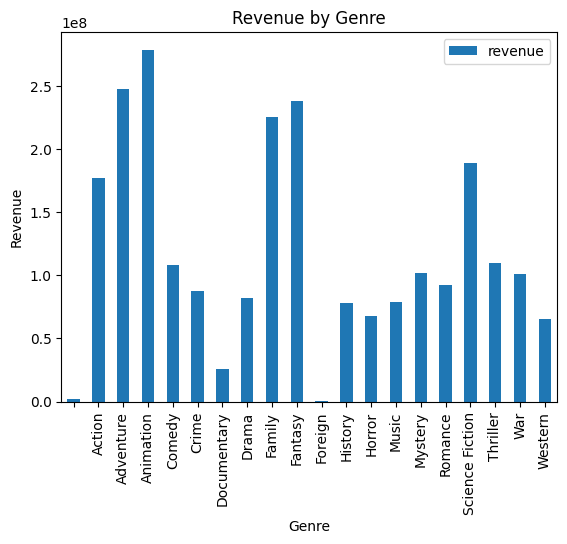

In [159]:
# Create bar plot of revenue by genre
grouped_by_genre.plot(kind='bar', x='genre_name', y='revenue')
plt.xlabel('Genre')
plt.ylabel('Revenue')
plt.title('Revenue by Genre')
plt.show()

### Data story with visualisations

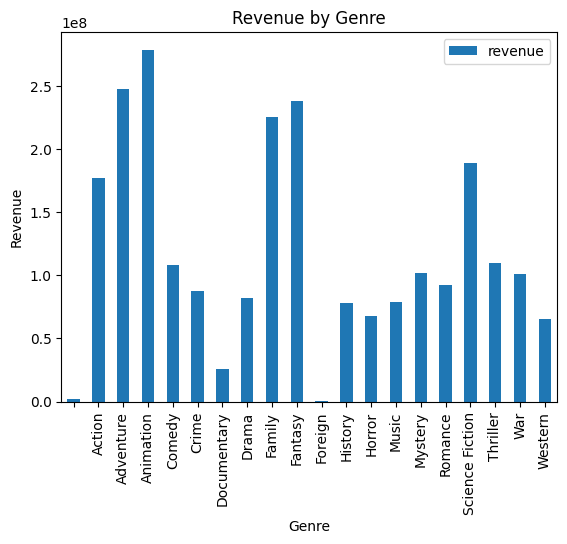

In [160]:
# Create bar plot of revenue by genre
grouped_by_genre.plot(kind='bar', x='genre_name', y='revenue')
plt.xlabel('Genre')
plt.ylabel('Revenue')
plt.title('Revenue by Genre')
plt.show()

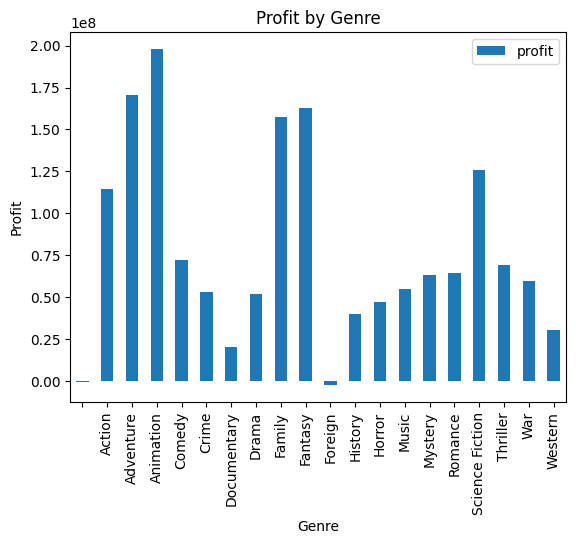

In [163]:
# Create bar plot of revenue by genre
grouped_by_genre.plot(kind='bar', x='genre_name', y='profit')
plt.xlabel('Genre')
plt.ylabel('Profit')
plt.title('Profit by Genre')
plt.show()

Movies in the Adventure, Animation, Family, Fantasy, and Science fiction genres generate the most revenue, as well as the most profit. 

<function matplotlib.pyplot.title(label, fontdict=None, loc=None, pad=None, *, y=None, **kwargs)>

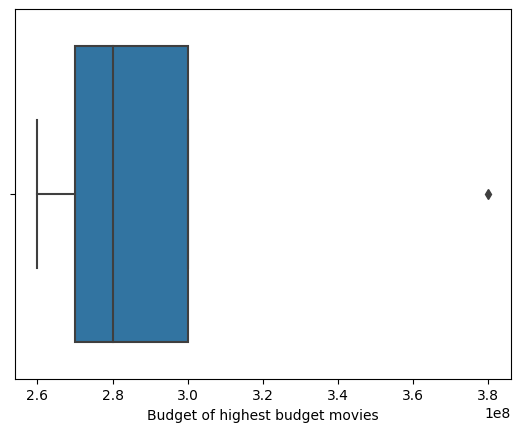

In [161]:
# Boxplots to visualise median and distribution of highest budget movies
sns.boxplot(x=highest_budget_movies['budget'])
plt.xlabel('Budget of highest budget movies')
plt.title

<function matplotlib.pyplot.title(label, fontdict=None, loc=None, pad=None, *, y=None, **kwargs)>

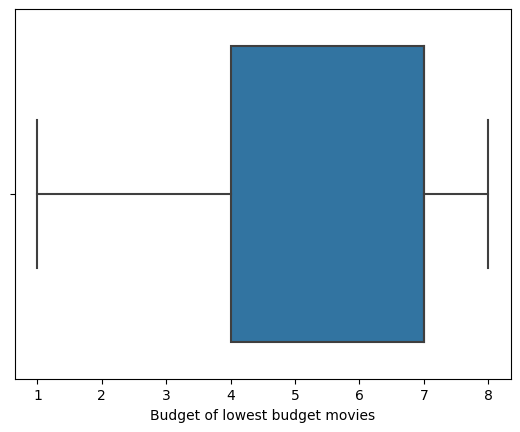

In [162]:
# Boxplots to visualise median and distribution of lowest budget movies
sns.boxplot(x=lowest_budget_movies['budget'])
plt.xlabel('Budget of lowest budget movies')
plt.title

The standard deviation of the highest budget movies is much greater than that of the lowest ones. Both box plots are negatively skewed, in particular for highest budget movies the max and upper quartile range overlap, and the highest value is plotted as an outlier. For lowest budget movies there is a negative skew, the median is the same as the upper quartile.

In [165]:
# Calculate the correlation between the profit and other variables
correlation = movies_df.corr()['profit']

# Sort the correlations in descending order
correlation = correlation.sort_values(ascending=False)

# Print the sorted correlations
print(correlation)

profit          1.000000
revenue         0.980003
vote_count      0.739198
popularity      0.588190
budget          0.550252
vote_average    0.230041
runtime         0.210144
release_year    0.098686
id              0.031648
Name: profit, dtype: float64


C:\Users\CA\AppData\Local\Temp\ipykernel_5864\3511128801.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = movies_df.corr()['profit']


Profit has the greatest correlation with revenue, closely followed by vote count and popularity. This is likely a testament to the importance of marketing in generating revenue. As vote average lags behind vote count, the primary importance of gettin as many eyeballs on the movie as possible, rather than needing outstanding reviews, is emphasised. Release year has a slight positive correlation, which may have to do with inflation over time.